# CFEM 2022: Foram importadas 2 bases de dados uma distribuidora e outra arrecadação

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cfem_distribuidora=pd.read_excel("cfem_distribuidora_2022.xlsx")

In [3]:
cfem_arrecadadacao=pd.read_excel("cfem_arrecadacao_2022.xlsx")

# 1. CFEM Distribuidora

In [4]:
cfem_distribuidora.sample(10)

,NúmeroDeDistribuição,Ano,Mês,Ente,SiglaEstado,NomeEnte,TipoDistribuição,Substância,TipoAfetamento,Valor
324,598,2022,5,Município,PA,CUMARU DO NORTE,Produtor,MINÉRIO DE OURO,-,124193.544000
356,601,2022,5,Município,MT,COLNIZA,Afetado,MINÉRIO DE OURO,Estrutura de mineração,161683.156147
404,603,2022,7,Município,MA,TURIAÇU,Afetado,MINÉRIO DE OURO,Estrutura de mineração,17009.247116
78,575,2022,1,Município,TO,BREJINHO DE NAZARÉ,Afetado,MINÉRIO DE OURO,Estrutura de mineração,50925.398035
10,564,2022,1,Município,MT,NOVA SANTA HELENA,Produtor,MINÉRIO DE OURO,-,4775.964000
272,596,2022,7,UF,AP,Amapá,-,MINÉRIO DE OURO,-,2202.907242
205,593,2022,4,UF,PA,Pará,-,MINÉRIO DE OURO,-,55373.801109
389,602,2022,7,Município,RN,CURRAIS NOVOS,Afetado,MINÉRIO DE OURO,Estrutura de mineração,28598.950573
354,601,2022,5,Município,MG,ITABIRITO,Afetado,MINÉRIO DE OURO,Estrutura de mineração,139.791981
209,594,2022,9,Município,MT,NOVO MUNDO,Produtor,MINÉRIO DE OURO,-,24303.978000


In [5]:
cfem_distribuidora.shape

(450, 10)

In [6]:
cfem_distribuidora.columns

Index(['NúmeroDeDistribuição', 'Ano', 'Mês', 'Ente', 'SiglaEstado', 'NomeEnte',
       'TipoDistribuição', 'Substância', 'TipoAfetamento', 'Valor'],
      dtype='object')

# Estatística para Valor

In [7]:
cfem_distribuidora.Valor.describe().round(2)

count        450.00
mean      109449.71
std       407938.09
min           88.54
25%         3208.92
50%        14366.52
75%        44765.58
max      4376807.09
Name: Valor, dtype: float64

# Só há Minério de Ouro na Distribuição

In [8]:
cfem_distribuidora.Substância.value_counts()

MINÉRIO DE OURO    450
Name: Substância, dtype: int64

In [9]:
cfem_distribuidora.TipoAfetamento.value_counts()

-                         226
Estrutura de mineração    224
Name: TipoAfetamento, dtype: int64

# Estados que mais aparecem

In [10]:
cfem_distribuidora.SiglaEstado.value_counts()

MT    125
MG     73
PA     59
GO     48
BA     37
TO     28
RO     23
AP     15
MA     14
PB      8
PE      8
RN      8
AM      4
Name: SiglaEstado, dtype: int64

# Nomes das Cidades que mais aparecem

In [11]:
cfem_distribuidora.NomeEnte.value_counts()

CUMARU DO NORTE           15
PORTO GRANDE              11
TURIAÇU                   10
MATUPÁ                     9
PEIXOTO DE AZEVEDO         9
                          ..
SÃO GONÇALO DO SAPUCAÍ     1
SENADOR JOSÉ PORFÍRIO      1
JARU                       1
GUARANTÃ DO NORTE          1
NOVA MAMORÉ                1
Name: NomeEnte, Length: 77, dtype: int64

# Para Valor < 100 mil

<Figure size 1440x720 with 0 Axes>

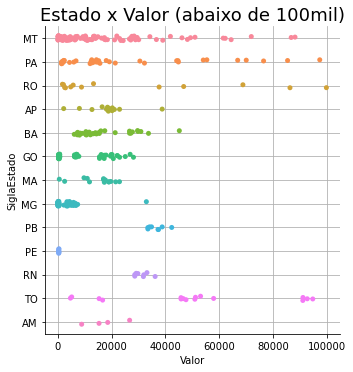

In [13]:
plt.figure(figsize=(20,10))
sns.catplot(data=cfem_distribuidora.query('Valor < 100000'), x='Valor', y='SiglaEstado')
plt.title("Estado x Valor (abaixo de 100mil)",fontsize=18)
plt.grid()

# Para Valor maior de 100 mil

<Figure size 1440x720 with 0 Axes>

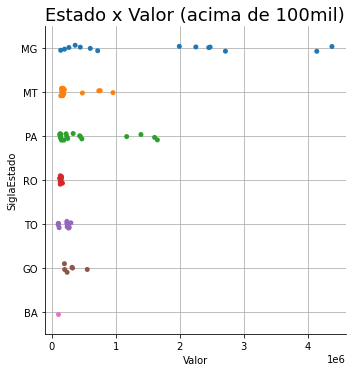

In [12]:
plt.figure(figsize=(20,10))
sns.catplot(data=cfem_distribuidora.query('Valor > 100000'), x='Valor', y='SiglaEstado')
plt.title("Estado x Valor (acima de 100mil)",fontsize=18)
plt.grid()

# Maranhão

In [14]:
cfem_distribuidora_MA= cfem_distribuidora.loc[(cfem_distribuidora['SiglaEstado'] == 'MA')]
cfem_distribuidora_MA

,NúmeroDeDistribuição,Ano,Mês,Ente,SiglaEstado,NomeEnte,TipoDistribuição,Substância,TipoAfetamento,Valor
33,574,2022,1,Município,MA,TURIAÇU,Afetado,MINÉRIO DE OURO,Estrutura de mineração,19695.377808
61,575,2022,1,Município,MA,TURIAÇU,Afetado,MINÉRIO DE OURO,Estrutura de mineração,18912.333506
89,576,2022,1,Município,MA,TURIAÇU,Afetado,MINÉRIO DE OURO,Estrutura de mineração,18996.538831
117,577,2022,1,Município,MA,TURIAÇU,Afetado,MINÉRIO DE OURO,Estrutura de mineração,21497.655621
135,580,2022,2,Município,MA,TURIAÇU,Produtor,MINÉRIO DE OURO,-,2557.974000
248,595,2022,8,UF,MA,Maranhão,-,MINÉRIO DE OURO,-,11790.304406
255,596,2022,7,Município,MA,TURIAÇU,Produtor,MINÉRIO DE OURO,-,22927.356000
275,596,2022,7,UF,MA,Maranhão,-,MINÉRIO DE OURO,-,9742.583439
301,597,2022,6,UF,MA,Maranhão,-,MINÉRIO DE OURO,-,10961.721322
332,598,2022,5,UF,MA,Maranhão,-,MINÉRIO DE OURO,-,568.565062


In [15]:
cfem_distribuidora_MA.shape

(14, 10)

# Soma do Valor por Estado MA nos meses de 2022 =  206.653,42

In [84]:
cfem_distribuidora_MA.Valor.sum()

206653.422854

<Figure size 1440x576 with 0 Axes>

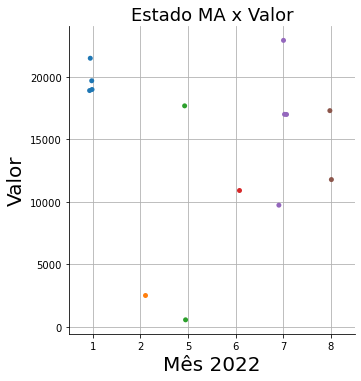

In [16]:
plt.figure(figsize=(20,8))
sns.catplot(data=cfem_distribuidora_MA, y='Valor', x="Mês", ci=200 )
plt.title("Estado MA x Valor",fontsize=18)
plt.xlabel('Mês 2022', fontsize=(20))
plt.ylabel('Valor', fontsize=(20))
plt.grid()

# Pará

In [17]:
cfem_distribuidora_PA= cfem_distribuidora.loc[(cfem_distribuidora['SiglaEstado'] == 'PA')]
cfem_distribuidora_PA

,NúmeroDeDistribuição,Ano,Mês,Ente,SiglaEstado,NomeEnte,TipoDistribuição,Substância,TipoAfetamento,Valor
17,564,2022,1,Município,PA,ITAITUBA,Produtor,MINÉRIO DE OURO,-,1.410849e+05
18,564,2022,1,Município,PA,CUMARU DO NORTE,Produtor,MINÉRIO DE OURO,-,8.535676e+04
19,564,2022,1,Município,PA,SANTA MARIA DAS BARREIRAS,Produtor,MINÉRIO DE OURO,-,7.644846e+04
20,564,2022,1,Município,PA,NOVO PROGRESSO,Produtor,MINÉRIO DE OURO,-,5.942526e+03
21,564,2022,1,Município,PA,RIO MARIA,Produtor,MINÉRIO DE OURO,-,2.448420e+03
42,574,2022,1,Município,PA,CUMARU DO NORTE,Afetado,MINÉRIO DE OURO,Estrutura de mineração,1.436121e+04
43,574,2022,1,Município,PA,SANTANA DO ARAGUAIA,Afetado,MINÉRIO DE OURO,Estrutura de mineração,1.641281e+03
70,575,2022,1,Município,PA,CUMARU DO NORTE,Afetado,MINÉRIO DE OURO,Estrutura de mineração,1.379024e+04
71,575,2022,1,Município,PA,SANTANA DO ARAGUAIA,Afetado,MINÉRIO DE OURO,Estrutura de mineração,1.576028e+03
98,576,2022,1,Município,PA,CUMARU DO NORTE,Afetado,MINÉRIO DE OURO,Estrutura de mineração,1.385164e+04


# Soma do Valor por Estado PA nos meses de 2022 = 10.303.008,93

In [85]:
cfem_distribuidora_PA.Valor.sum()

10303008.932569

<Figure size 1440x576 with 0 Axes>

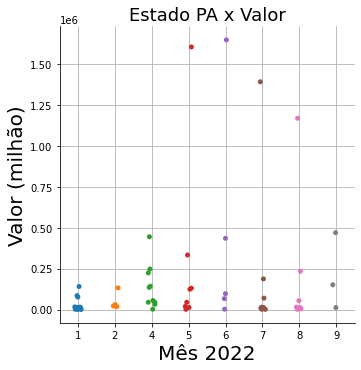

In [18]:
plt.figure(figsize=(20,8))
sns.catplot(data=cfem_distribuidora_PA, y='Valor', x="Mês", ci=200 )
plt.title("Estado PA x Valor",fontsize=18)
plt.xlabel('Mês 2022', fontsize=(20))
plt.ylabel('Valor (milhão)', fontsize=(20))
plt.grid()

# Rondônia

In [19]:
cfem_distribuidora_RO= cfem_distribuidora.loc[(cfem_distribuidora['SiglaEstado'] == 'RO')]
cfem_distribuidora_RO.head()

,NúmeroDeDistribuição,Ano,Mês,Ente,SiglaEstado,NomeEnte,TipoDistribuição,Substância,TipoAfetamento,Valor
22,564,2022,1,Município,RO,PORTO VELHO,Produtor,MINÉRIO DE OURO,-,46768.662000
47,574,2022,1,Município,RO,URUPÁ,Afetado,MINÉRIO DE OURO,Estrutura de mineração,152946.918247
75,575,2022,1,Município,RO,URUPÁ,Afetado,MINÉRIO DE OURO,Estrutura de mineração,146866.089879
103,576,2022,1,Município,RO,URUPÁ,Afetado,MINÉRIO DE OURO,Estrutura de mineração,147519.996883
131,577,2022,1,Município,RO,URUPÁ,Afetado,MINÉRIO DE OURO,Estrutura de mineração,166942.731950


# Soma do Valor por Estado RO nos meses de 2022 = 1.786.444,61

In [87]:
cfem_distribuidora_RO.Valor.sum()

1786444.61394

<Figure size 1440x576 with 0 Axes>

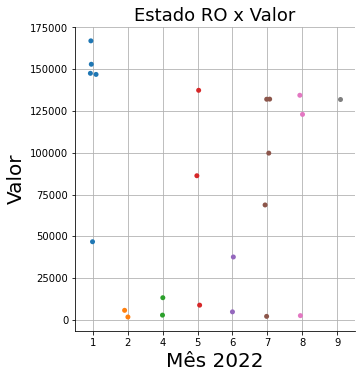

In [20]:
plt.figure(figsize=(20,8))
sns.catplot(data=cfem_distribuidora_RO, y='Valor', x="Mês", ci=200 )
plt.title("Estado RO x Valor",fontsize=18)
plt.xlabel('Mês 2022', fontsize=(20))
plt.ylabel('Valor', fontsize=(20))
plt.grid()

# 2. CFEM Arrecadação

In [21]:
cfem_arrecadadacao.head()

,Ano,Mês,Processo,AnoDoProcesso,Tipo_PF_PJ,CPF_CNPJ,Substância,UF,Município,QuantidadeComercializada,UnidadeDeMedida,ValorRecolhido
0,2022,1,920047,2012,PF,***279883**,ÁGUA MINERAL,SP,POÁ,0.00,l,478.50
1,2022,1,831171,2016,PJ,371691000130,AREIA,MG,NAZARENO,513.42,t,389.57
2,2022,1,860209,1993,PJ,798638000110,ÁGUA MINERAL,TO,APARECIDA DO RIO NEGRO,1.00,l,2462.66
3,2022,1,846003,2018,PJ,841691000156,QUARTZITO,PB,BARRA DE SANTA ROSA,58.98,m3,5252.48
4,2022,1,815146,1988,PJ,855016000186,AREIA DE FUNDIÇÃO,SC,ARAQUARI,5279.14,t,5369.78


In [22]:
cfem_arrecadadacao.Substância.value_counts(ascending=True)

ÁGATA                  1
ALUMÍNIO               1
MINÉRIO DE LÍTIO       1
MOSCOVITA              1
URÂNIO                 1
                    ... 
MINÉRIO DE OURO      611
ÁGUA MINERAL         633
GRANITO              689
ARGILA               990
AREIA               2924
Name: Substância, Length: 144, dtype: int64

# Arrecadação Ouro


In [23]:
cfem_arrecadacao_ouro= cfem_arrecadadacao.loc[(cfem_arrecadadacao['Substância'] == 'OURO')]
cfem_arrecadacao_ouro

,Ano,Mês,Processo,AnoDoProcesso,Tipo_PF_PJ,CPF_CNPJ,Substância,UF,Município,QuantidadeComercializada,UnidadeDeMedida,ValorRecolhido
86,2022,1,850335,1993,PJ,34180451000170,OURO,PA,ITAITUBA,153.00,g,621.90
192,2022,1,850817,1982,PJ,14572101000141,OURO,AP,CALÇOENE,1225.70,g,6435.94
208,2022,1,958116,2017,PJ,788904000123,OURO,AP,CALÇOENE,0.00,g,473.72
215,2022,1,853158,1994,PJ,11495073000118,OURO,PA,ITAITUBA,71.23,g,294.18
216,2022,1,855190,1995,PJ,11495073000118,OURO,PA,ITAITUBA,71.43,g,290.44
...,...,...,...,...,...,...,...,...,...,...,...,...
9453,2022,9,867144,2014,PJ,20155248000139,OURO,MT,MATUPÁ,554.18,g,2037.34
9467,2022,9,886922,1998,PJ,20155248000139,OURO,RO,PORTO VELHO,127.50,g,503.71
9501,2022,9,872851,2005,PJ,22103965000142,OURO,BA,SANTALUZ,735.09,g,2774.05
9543,2022,9,866863,2013,PJ,8673569000120,OURO,MT,PEIXOTO DE AZEVEDO,36.50,g,133.48


# Estatística para Arrecadação de Ouro

In [24]:
cfem_arrecadacao_ouro.describe()

,Ano,Mês,Processo,AnoDoProcesso,QuantidadeComercializada,ValorRecolhido
count,175.0,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,2022.0,4.668571,849983.337143,2002.451429,16922.194343,8.352673e+04
std,0.0,2.448055,114263.526861,14.929208,69083.079936,3.368229e+05
min,2022.0,1.000000,4951.000000,1935.000000,0.000000,5.520000e+01
25%,2022.0,3.000000,856379.500000,1995.000000,145.650000,6.457250e+02
50%,2022.0,5.000000,866553.000000,2004.000000,722.480000,2.907420e+03
75%,2022.0,7.000000,867143.500000,2014.000000,4005.720000,1.574449e+04
max,2022.0,9.000000,958116.000000,2020.000000,529889.850000,2.256583e+06


# Arrecadação de Ouro: soma Valor Recolhido = 14.617.177,34, Soma da Quantidade Comercializada em g = 2.961.384,01 nos meses de 2022
## 

In [96]:
Razão =(14617177/2961384)
Razão

4.935927593314477

## A divisão do Valor Recolhido / Quantidade Comercializada = 4.93 /g de ouro

In [89]:
cfem_arrecadacao_ouro.ValorRecolhido.sum()


14617177.34

In [90]:
cfem_arrecadacao_ouro.QuantidadeComercializada.sum()

2961384.01

# Arrecadação Minério Ouro

In [25]:
cfem_arrecadacao_ouro_minerio= cfem_arrecadadacao.loc[(cfem_arrecadadacao['Substância']== 'MINÉRIO DE OURO')]
cfem_arrecadacao_ouro_minerio

,Ano,Mês,Processo,AnoDoProcesso,Tipo_PF_PJ,CPF_CNPJ,Substância,UF,Município,QuantidadeComercializada,UnidadeDeMedida,ValorRecolhido
160,2022,1,850819,2019,PJ,8673569000120,MINÉRIO DE OURO,PA,ITAITUBA,712.27,g,2803.80
161,2022,1,850549,2014,PJ,8673569000120,MINÉRIO DE OURO,PA,JACAREACANGA,8774.04,g,35605.04
205,2022,1,866390,2020,PJ,8673569000120,MINÉRIO DE OURO,MT,ARIPUANÃ,16393.40,g,57027.12
214,2022,1,850144,2018,PJ,11495073000118,MINÉRIO DE OURO,PA,ITAITUBA,499.80,g,2128.92
230,2022,1,866499,2012,PJ,8673569000120,MINÉRIO DE OURO,MT,POCONÉ,93.53,g,225.03
...,...,...,...,...,...,...,...,...,...,...,...,...
9499,2022,9,866390,2014,PJ,20155248000139,MINÉRIO DE OURO,MT,ROSÁRIO OESTE,61.28,g,246.79
9500,2022,9,870189,1988,PJ,22103965000142,MINÉRIO DE OURO,BA,SANTALUZ,8541.01,g,32231.59
9541,2022,9,866066,2012,PJ,8673569000120,MINÉRIO DE OURO,MT,APIACÁS,1622.50,g,6114.18
9542,2022,9,866908,2016,PJ,8673569000120,MINÉRIO DE OURO,MT,PARANAÍTA,1128.20,g,4511.51


In [26]:
cfem_arrecadacao_ouro_minerio.describe()

,Ano,Mês,Processo,AnoDoProcesso,QuantidadeComercializada,ValorRecolhido
count,611.0,611.000000,611.000000,611.000000,6.110000e+02,6.110000e+02
mean,2022.0,4.469722,861511.083470,2013.988543,9.890788e+03,4.342599e+04
std,0.0,2.342127,38621.594884,6.040698,7.557046e+04,3.332585e+05
min,2022.0,1.000000,323.000000,1973.000000,0.000000e+00,5.404000e+01
25%,2022.0,2.000000,850688.000000,2012.000000,2.008450e+02,9.115100e+02
50%,2022.0,4.000000,866228.000000,2015.000000,1.074600e+03,4.589200e+03
75%,2022.0,7.000000,866685.000000,2018.000000,4.714300e+03,2.254008e+04
max,2022.0,9.000000,966326.000000,2021.000000,1.681268e+06,7.294678e+06


## A divisão do Valor Recolhido / Quantidade Comercializada = 4.39 /g de (minerio de ouro)

In [97]:
cfem_arrecadacao_ouro_minerio.ValorRecolhido.sum()

26533282.099999998

In [98]:
cfem_arrecadacao_ouro_minerio.QuantidadeComercializada.sum()

6043271.41

In [99]:
Razão =(26533282.099999998/6043271.41)
Razão

4.390549472276638

# Arrecadação em Ouro e Minério de Ouro

In [32]:
ouro= cfem_arrecadadacao[cfem_arrecadadacao["Substância"].str.contains("OURO")]
ouro

,Ano,Mês,Processo,AnoDoProcesso,Tipo_PF_PJ,CPF_CNPJ,Substância,UF,Município,QuantidadeComercializada,UnidadeDeMedida,ValorRecolhido
86,2022,1,850335,1993,PJ,34180451000170,OURO,PA,ITAITUBA,153.00,g,621.90
160,2022,1,850819,2019,PJ,8673569000120,MINÉRIO DE OURO,PA,ITAITUBA,712.27,g,2803.80
161,2022,1,850549,2014,PJ,8673569000120,MINÉRIO DE OURO,PA,JACAREACANGA,8774.04,g,35605.04
192,2022,1,850817,1982,PJ,14572101000141,OURO,AP,CALÇOENE,1225.70,g,6435.94
205,2022,1,866390,2020,PJ,8673569000120,MINÉRIO DE OURO,MT,ARIPUANÃ,16393.40,g,57027.12
...,...,...,...,...,...,...,...,...,...,...,...,...
9541,2022,9,866066,2012,PJ,8673569000120,MINÉRIO DE OURO,MT,APIACÁS,1622.50,g,6114.18
9542,2022,9,866908,2016,PJ,8673569000120,MINÉRIO DE OURO,MT,PARANAÍTA,1128.20,g,4511.51
9543,2022,9,866863,2013,PJ,8673569000120,OURO,MT,PEIXOTO DE AZEVEDO,36.50,g,133.48
9565,2022,9,866939,2012,PJ,20155248000139,MINÉRIO DE OURO,MT,NOVA GUARITA,306.13,g,1164.00


# Juntando minério de Ouro e Ouro: Estatística

In [101]:
ouro.describe()

,Ano,Mês,Processo,AnoDoProcesso,QuantidadeComercializada,ValorRecolhido
count,786.0,786.000000,786.000000,786.000000,7.860000e+02,7.860000e+02
mean,2022.0,4.513995,858944.473282,2011.419847,1.145630e+04,5.235427e+04
std,0.0,2.365987,63844.370393,10.041154,7.419016e+04,3.342572e+05
min,2022.0,1.000000,323.000000,1935.000000,0.000000e+00,5.404000e+01
25%,2022.0,2.000000,850822.000000,2010.000000,1.841125e+02,8.294100e+02
50%,2022.0,4.000000,866269.000000,2014.000000,9.736900e+02,4.247920e+03
75%,2022.0,7.000000,866863.000000,2017.000000,4.391550e+03,2.112365e+04
max,2022.0,9.000000,966326.000000,2021.000000,1.681268e+06,7.294678e+06


## A divisão do Valor Recolhido / Quantidade Comercializada = 4.59 /g de (minerio de ouro + ouro)

In [102]:
ouro.ValorRecolhido.sum()

41150459.44

In [103]:
ouro.QuantidadeComercializada.sum()

9004655.42

In [104]:
Razão =(41150459/9004655.42)
Razão

4.569909350290275

# Arrecadação Ouro
## Foram separados os gráfico em menor 1000 e maior de 1000, para melhorar as visualizações, no eixo x

<Figure size 1440x576 with 0 Axes>

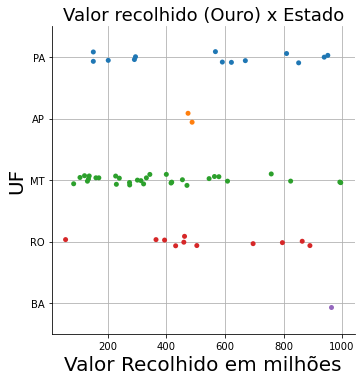

In [121]:
plt.figure(figsize=(20,8))
sns.catplot(data=cfem_arrecadacao_ouro.query("ValorRecolhido < 1000"), y='UF', x="ValorRecolhido", ci=200 )
plt.title("Valor recolhido (Ouro) x Estado",fontsize=18)
plt.xlabel('Valor Recolhido em milhões', fontsize=(20))
plt.ylabel('UF', fontsize=(20))
plt.grid()


<Figure size 1440x576 with 0 Axes>

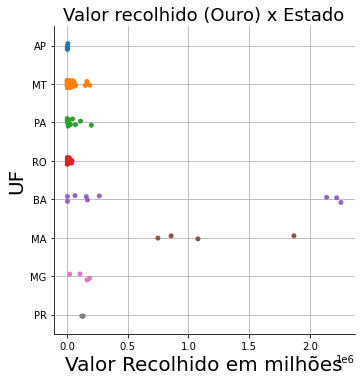

In [122]:
plt.figure(figsize=(20,8))
sns.catplot(data=cfem_arrecadacao_ouro.query("ValorRecolhido > 1000"), y='UF', x="ValorRecolhido", ci=200 )
plt.title("Valor recolhido (Ouro) x Estado",fontsize=18)
plt.xlabel('Valor Recolhido em milhões', fontsize=(20))
plt.ylabel('UF', fontsize=(20))
plt.grid()

<Figure size 1440x576 with 0 Axes>

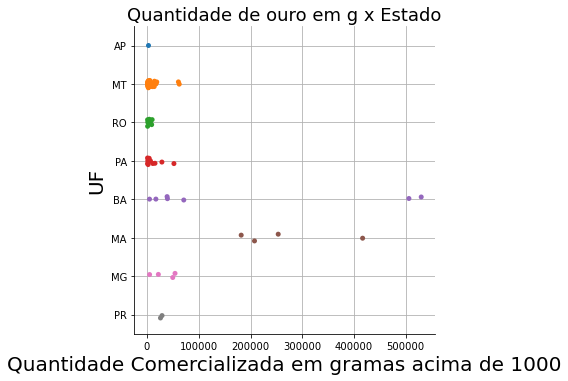

In [130]:
plt.figure(figsize=(20,8))
sns.catplot(data=cfem_arrecadacao_ouro.query("QuantidadeComercializada > 1000"), y='UF', x="QuantidadeComercializada", ci=200 )
plt.title("Quantidade de ouro em g x Estado",fontsize=18)
plt.xlabel('Quantidade Comercializada em gramas acima de 1000', fontsize=(20))
plt.ylabel('UF', fontsize=(20))
plt.grid()

<Figure size 1440x576 with 0 Axes>

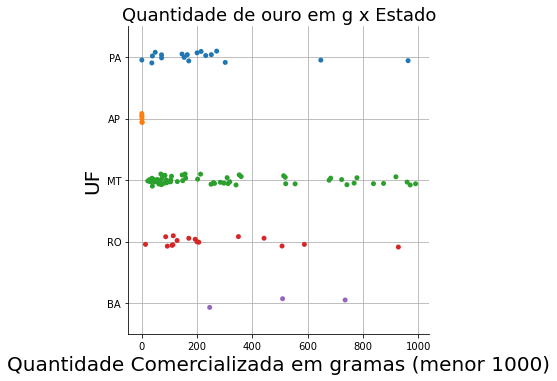

In [129]:
plt.figure(figsize=(20,8))
sns.catplot(data=cfem_arrecadacao_ouro.query("QuantidadeComercializada < 1000"), y='UF', x="QuantidadeComercializada", ci=200 )
plt.title("Quantidade de ouro em g x Estado",fontsize=18)
plt.xlabel('Quantidade Comercializada em gramas (menor 1000)', fontsize=(20))
plt.ylabel('UF', fontsize=(20))
plt.grid()

Text(0, 0.5, 'Valor Recolhido em milões')

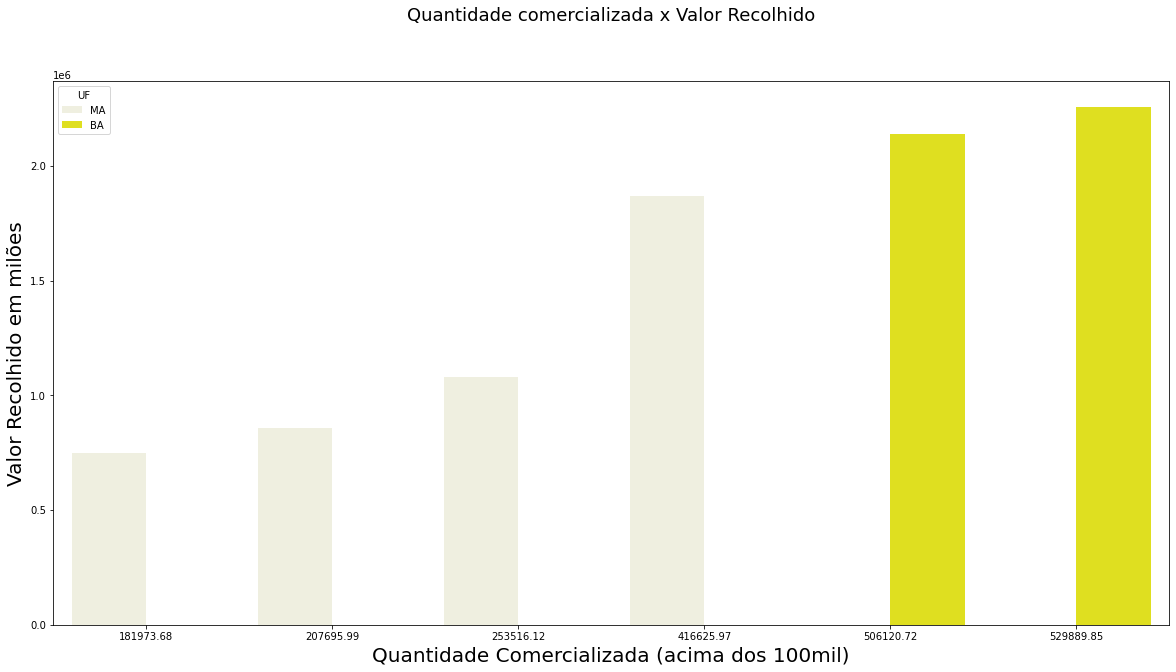

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(data=cfem_arrecadacao_ouro.query("QuantidadeComercializada > 100000"), y='ValorRecolhido', x="QuantidadeComercializada", ci=200, color="yellow", hue="UF" )
plt.title("Quantidade comercializada x Valor Recolhido",fontsize=18, y=1.10)
plt.xlabel('Quantidade Comercializada (acima dos 100mil)', fontsize=(20))
plt.ylabel('Valor Recolhido em milões', fontsize=(20))


<Figure size 1440x576 with 0 Axes>

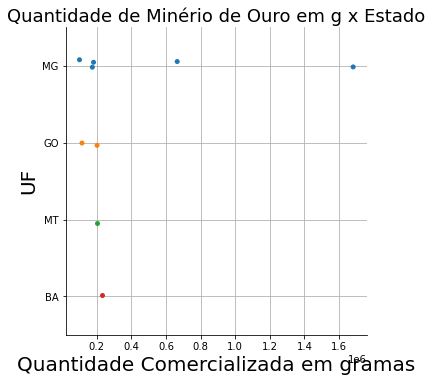

In [125]:
plt.figure(figsize=(20,8))
sns.catplot(data=cfem_arrecadacao_ouro_minerio.query("QuantidadeComercializada > 100000"), y='UF', x="QuantidadeComercializada", ci=200 )
plt.title("Quantidade de Minério de Ouro em g x Estado",fontsize=18)
plt.xlabel('Quantidade Comercializada em gramas', fontsize=(20))
plt.ylabel('UF', fontsize=(20))
plt.grid()

Text(0, 0.5, 'Valor Recolhido em milhões ')

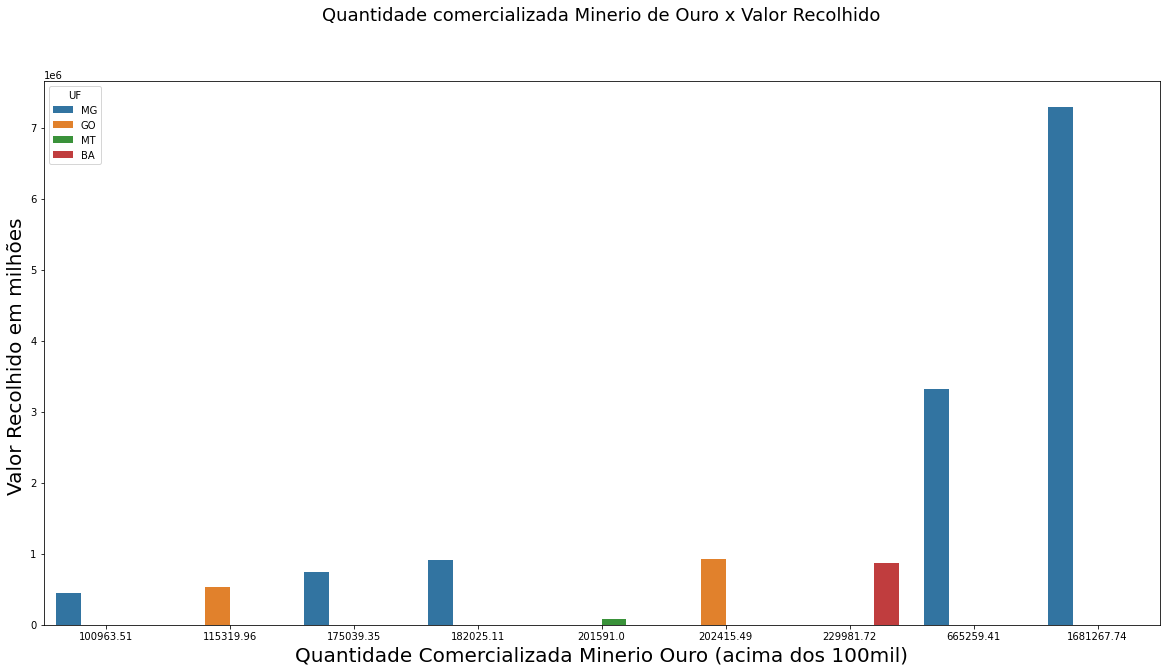

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(data=cfem_arrecadacao_ouro_minerio.query("QuantidadeComercializada > 100000"), y='ValorRecolhido', x="QuantidadeComercializada", ci=200, hue="UF" )
plt.title("Quantidade comercializada Minerio de Ouro x Valor Recolhido",fontsize=18, y=1.10)
plt.xlabel('Quantidade Comercializada Minerio Ouro (acima dos 100mil)', fontsize=(20))
plt.ylabel('Valor Recolhido em milhões ', fontsize=(20))


Text(0, 0.5, 'Valor Recolhido em milhões ')

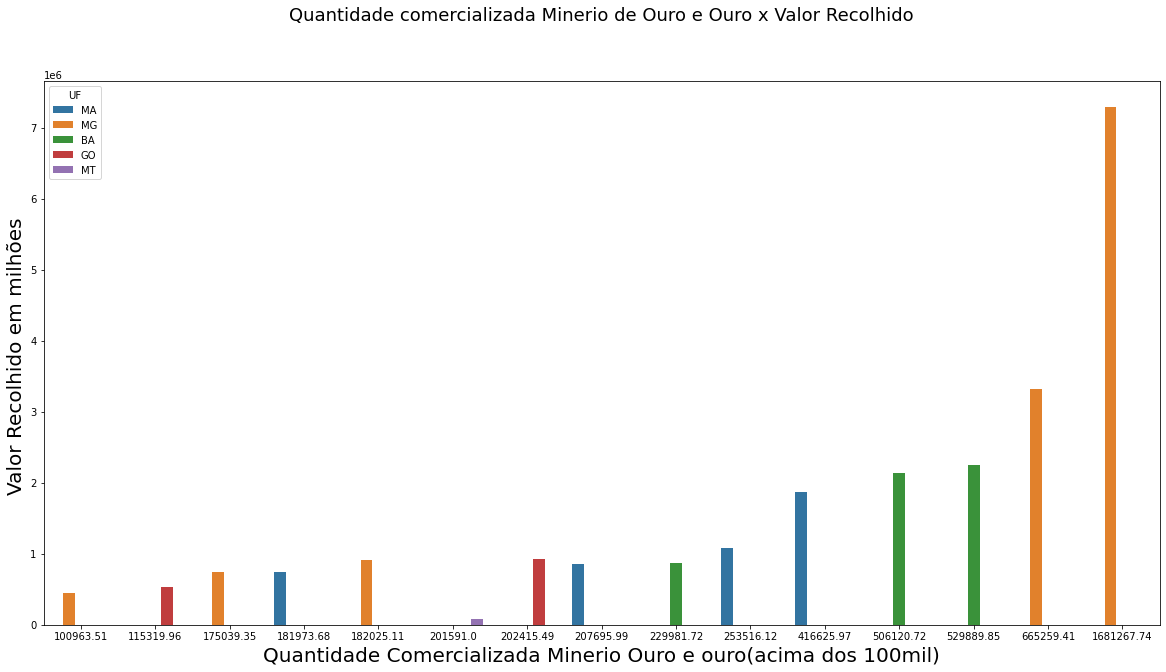

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(data=ouro.query("QuantidadeComercializada > 100000"), y='ValorRecolhido', x="QuantidadeComercializada", ci=200, hue="UF" )
plt.title("Quantidade comercializada Minerio de Ouro e Ouro x Valor Recolhido",fontsize=18, y=1.10)
plt.xlabel('Quantidade Comercializada Minerio Ouro e ouro(acima dos 100mil)', fontsize=(20))
plt.ylabel('Valor Recolhido em milhões ', fontsize=(20))

# 3. Construindo um modelo de Predição para Arrecadação, buscando encontrar o Valor Recolhido para Ouro 

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
y = ouro['ValorRecolhido']

In [46]:
X = ouro[['QuantidadeComercializada', 'AnoDoProcesso', 'Processo' ]]

In [47]:
X_train, X_test, y_train, y_test= train_test_split(X, y , test_size=0.3, random_state=2811)

In [48]:
X_train.shape

(550, 3)

In [49]:
X_test.shape

(236, 3)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [50]:
modelo = LinearRegression()

In [51]:
modelo.fit(X_train, y_train)

LinearRegression()

# O Modelo Regressão Linear apresentou um R² =86% para os dados de Treino

In [53]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.86


In [54]:
y_previsto = modelo.predict(X_test)

# O Modelo Regressão Linear apresentou um R² =90% para os dados de Teste

In [55]:
print('R2 = %s'  % metrics.r2_score(y_test, y_previsto).round(2))

R2 = 0.9


# Aplicando algumas entradas no modelo a resposta para a Quantidade Comercializada de ouro= 31.7884,92g é um Valor Recolhido de 99.061,30 

In [77]:
entrada= X_test[55:56]
entrada

,QuantidadeComercializada,AnoDoProcesso,Processo
9117,31784.92,2020,851279


In [78]:
modelo.predict(entrada)[0]

99061.30112950318

# Aplicando mais uma entrada no modelo a resposta para a Quantidade Comercializada de ouro= 15000 g é um Valor Recolhido de 33.866
## Dividindo um pelo outro no modelo: valor recolhido por kg de ouro = 2.257, 73

In [76]:
QuantidadeComercializada= 15000
AnoDoProcesso = 2020
Processo= 866390
entrada2=[[QuantidadeComercializada, AnoDoProcesso, Processo]]

print('{0:.2f}'.format(modelo.predict(entrada2)[0]))

33866.01


C:\Users\ADRIANE1\anaconda3a\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [108]:
divisão=(33866.01/15)
divisão

2257.734